## Homework 2 Part 2 Task 1: PCA
We will use the Fashion-MNIST dataset to build a PCA model. <br>
https://github.com/zalandoresearch/fashion-mnist <br>
Then, we will use the PCA model to <br>
(1) visualize the data in 2D <br>
(2) generate new images as a generative model <br>
This is a guided-task: <br>
You will see the output of a code cell and then figure out the code in that cell. <br>
In each code cell, there are instructions to help you. <br>
This is a very efficient and effective way to learn how to program with sk-learn

#### First, we load the dataset

In [4]:
# load the data, and it may take a while
from sklearn.datasets import fetch_openml
fasion_mnist=fetch_openml(name="Fashion-MNIST")

/Users/mattelpus/anaconda3/lib/python3.11/site-packages/sklearn/datasets/_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [5]:
#contact TA or instructor if this cell does not work - mostly because you have old versions of some packages
try:
    data=fasion_mnist.data.values
except:
    data=fasion_mnist.data
#data should be numpy array    
images=data.reshape(-1,28,28)
target=fasion_mnist.target.astype('int64')

In [6]:
#a row in data is an image (28x28 reshaped into a vector of 784 elements)
data.shape

(70000, 784)

In [10]:
# images[0] is the first image (28x28)
images.shape

(70000, 28, 28)

In [12]:
#an element in target is the class label of the corresponding image in data
target.shape

(70000,)

In [14]:
[target.min(), target.max()]

[0, 9]

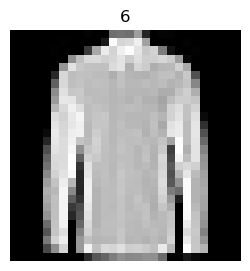

<Figure size 640x480 with 0 Axes>

In [16]:
# show some of the images
%matplotlib inline
import matplotlib.pyplot as plt
from IPython import display
fig, ax = plt.subplots(figsize=(3, 3))
for n in range(0, target.shape[0], 1000):
    x=data[n,:]
    x=x.reshape(28,28) # reshape a vector to an image
    ax.imshow(x, cmap='gray')    
    ax.axis('off')
    ax.set_title(target[n])
    plt.draw()
    display.clear_output(wait=True)
    display.display(fig)
    plt.pause(0.1)  

#### we need the function plot_components for visualization

In [19]:
from matplotlib import offsetbox
import numpy as np
def plot_components(data, model, images, ax=None,
                    thumb_frac=0.05, cmap='gray'):
    ax = ax or plt.gca()
    
    proj = model.fit_transform(data)
    ax.plot(proj[:, 0], proj[:, 1], '.k')
    
    if images is not None:
        min_dist_2 = (thumb_frac * max(proj.max(0) - proj.min(0))) ** 2
        shown_images = np.array([2 * proj.max(0)])
        for i in range(data.shape[0]):
            dist = np.sum((proj[i] - shown_images) ** 2, 1)
            if np.min(dist) < min_dist_2:
                # don't show points that are too close
                continue
            shown_images = np.vstack([shown_images, proj[i]])
            imagebox = offsetbox.AnnotationBbox(
                offsetbox.OffsetImage(images[i], cmap=cmap),
                                      proj[i])
            ax.add_artist(imagebox)

### Your work begins here

In [23]:
#use IncrementalPCA (instead of original PCA) in sk-learn
#it runs faster to get the eigenvectors and eigenvalues
#it is more memory efficient
#the function 'fit' computes eigenvectors and eigenvalues
#use 'fit_transform' to do fit and forward transform together
from  sklearn.decomposition import IncrementalPCA

n_components = 2
batch_size = 500
ipca = IncrementalPCA(n_components=n_components, batch_size=batch_size)
X_ipca = ipca.fit_transform(data)
print(X_ipca)

[[ -126.06210131  1629.72714749]
 [ 1407.39385585  -452.14522821]
 [ -725.45517908 -1103.74529856]
 ...
 [ -510.54126459  -728.45869148]
 [ -220.84531804 -1413.1030654 ]
 [-1521.17353394    93.05690093]]


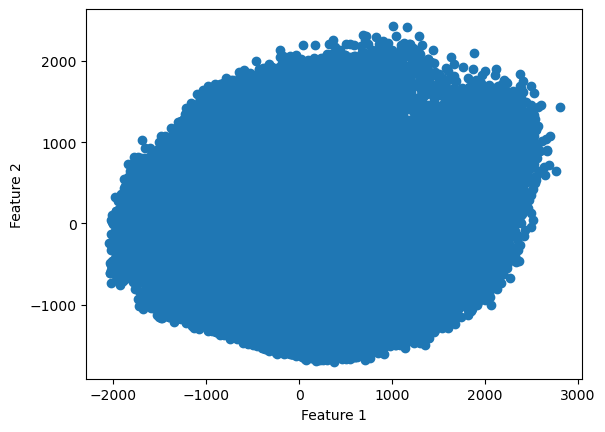

In [27]:
#show the data points in 2D
#you can find example code in my lecture notes (notebook files)
#you need to create a figure and axis:  fig, ax = plt.suplots()

fig, ax = plt.subplots()
ax.scatter(X_ipca[:,0], X_ipca[:,1])
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
plt.show()


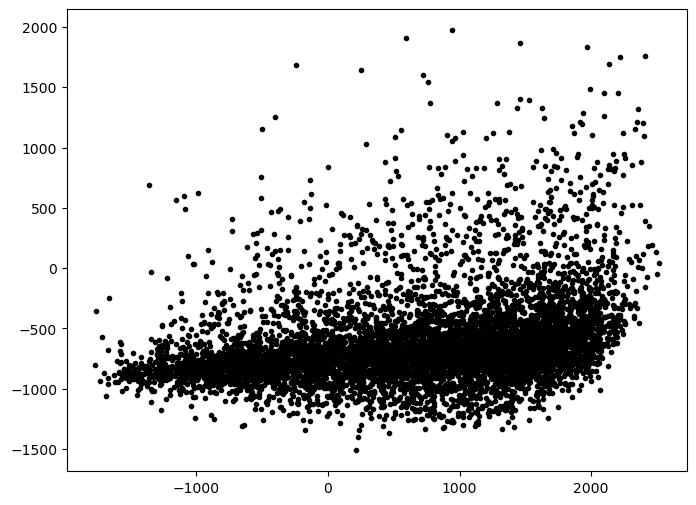

In [33]:
#show only the data points/images with class label=0 (i.e. target is 0) in 2D

mask = (target == 0)
data_0 = data[mask]
X_ipca_0 = ipca.fit_transform(data_0)
X_ipca_label_0 = X_ipca[target == 0]
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(X_ipca_label_0[:, 0], X_ipca_label_0[:, 1], c='k', marker='.')
plt.show()


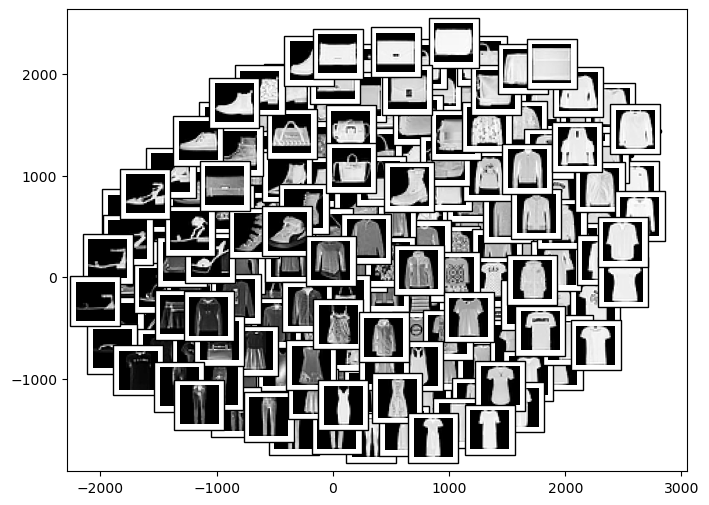

In [35]:
# use plot_components to show the data points
# the parameter 'model' of plot_components refers to the pca model
fig, ax = plt.subplots(figsize=(8, 6))
plot_components(X_ipca, model=ipca, images=images, ax=ax, cmap='gray')
plt.show()


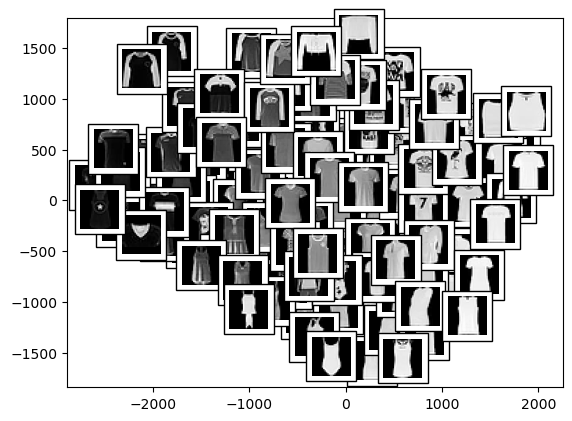

In [37]:
# use plot_components to show the data points with class label=0
# you may need something like this: data[target==0], images[target==0]
mask = (target == 0)
data_1 = data[mask]
images_1 = images[mask]
X_ipca_1 = ipca.fit_transform(data_1)
fig, ax = plt.subplots()
plot_components(data_1, ipca, images_1, ax=ax, cmap='gray')
plt.show()


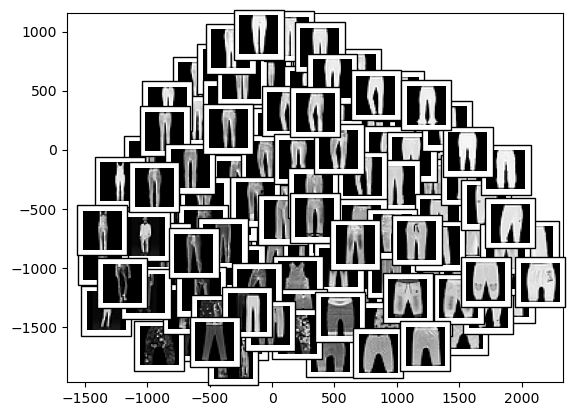

In [39]:
# use plot_components to show the data points with class label=1
# you may need something like this: data[target==1], images[target==1]

mask = (target == 1)
data_1 = data[mask]
images_1 = images[mask]
X_ipca_1 = ipca.fit_transform(data_1)
fig, ax = plt.subplots()
plot_components(data_1, ipca, images_1, ax=ax, cmap='gray')
plt.show()


From the above examples, we can see that PCA can extract meaningful features from the images 

### 2. Use PCA to generate new images 

First, we need to figure out how many components we need

In [42]:
#use IncrementalPCA (instead of original PCA) in sk-learn
#set n_components to a large number, e.g, 100
n_components = 100
batch_size = None
ipca = IncrementalPCA(n_components=n_components, batch_size=batch_size, copy=True, whiten=False)
print(ipca.get_params())


{'batch_size': None, 'copy': True, 'n_components': 100, 'whiten': False}


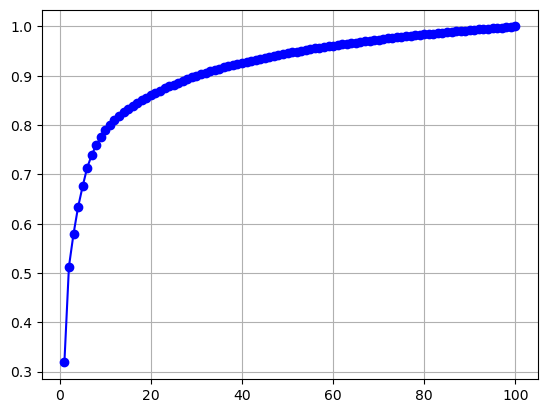

In [46]:
#plot the curve of 'percentage of variance explained' (0~1) vs n_components (0~100)
#apply np.cumsum on explained_variance_ratio_
# use plt.grid() to show grid

n_components = 100
batch_size = None
ipca = IncrementalPCA(n_components=n_components, batch_size=batch_size, copy=True, whiten=False)
X_ipca = ipca.fit_transform(data)
variances = ipca.explained_variance_
total_variance = np.sum(variances)
var_exp = variances / total_variance
cum_var_exp = np.cumsum(var_exp)
fig, ax = plt.subplots()
ax.plot(range(1, len(cum_var_exp) + 1), cum_var_exp, 'bo-')
plt.grid()
plt.show()

In [52]:
# write code to find the smallest value of n_component such that 
# (1) average reconstruction error is <= 20%
# (2) percentage of variance explained is >= 80%
# (3) cumulative explained variance ratio >= 80%
# (1), (2) and (3) are essentially the same, so you just use (3)
# you do not need to re-fit the model using this new value of n_component

target_error = 0.20
target_variance = 0.80
variances = ipca.explained_variance_
total_variance = np.sum(variances)
var_exp = variances / total_variance
cum_var_exp = np.cumsum(var_exp)
n_components = np.argmax((cum_var_exp >= target_variance) & (var_exp >= target_variance)) + 1
print('The smallest value of n_components is', n_components)

The smallest value of n_components is 1


In [54]:
# get the mean, eigenvalues, and eigenvectors from the pca model
# assume that:
# the name of mean is mu
# the name of eigenvalues is v (a 1D array)
# the name of eigenvectors is w (a 2D array)
mu = ipca.mean_
v = ipca.explained_variance_
w = ipca.components_


In [56]:
v.shape

(100,)

In [58]:
w.shape

(100, 784)

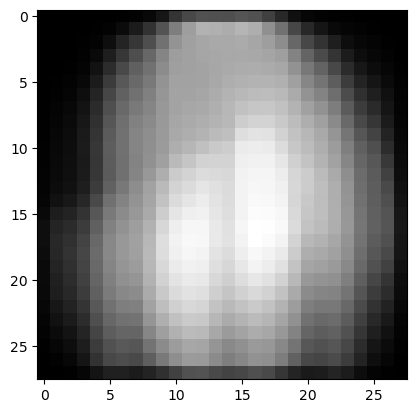

In [60]:
# plot the mean image from pca
# you need to reshape it to 28x28
plt.imshow(mu.reshape(28,28), cmap='gray')

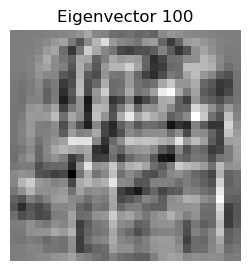

<Figure size 640x480 with 0 Axes>

In [62]:
# use a for loop to show the images of eigenvectors
# image is w[n].reshape(28,28)
# sample code:
# fig, ax = plt.subplots(figsize=(3, 3))
# for n in range(0, 100):
#     ax.imshow(w[n].reshape(28,28), cmap='gray')    
#     ax.axis('off')
#     ax.set_title(n)
#     plt.draw()
#     display.clear_output(wait=True)
#     display.display(fig)
#     plt.pause(0.2) 

fig, ax = plt.subplots(figsize=(3, 3))
for n in range(0, w.shape[0]):
    ax.imshow(w[n].reshape(28,28), cmap='gray')    
    ax.axis('off')
    ax.set_title('Eigenvector {}'.format(n+1))
    plt.draw()
    display.clear_output(wait=True)
    display.display(fig)
    plt.pause(0.2)


In [64]:
# L2 norm of an eigenvector w[0]
np.sum(w[0]**2)

1.0000000000000004

In [66]:
# generate a random number
3*np.random.randn()

-0.4715884790449174

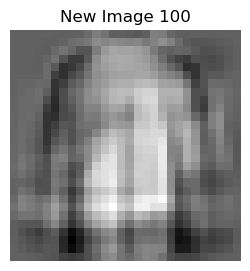

<Figure size 640x480 with 0 Axes>

In [68]:
# generate and show the new images
# use a for loop to geneate 100 new images
#     inside the for loop
#     x_new = mu + y[0]*sqrt(v[0])*w[0]+...+y[K]*sqrt(v[K])*w[K]
#     use a for loop to get X_new using the above equation
#     K is the number of components
#     y[k] is a random number generated using 3*np.random.randn()

n_new_images = 100
fig, ax = plt.subplots(figsize=(3, 3))
for n in range(n_new_images):
    y = 3 * np.random.randn(n_components)
    x_new = mu + np.dot(y * np.sqrt(v), w)
    x_new = x_new.reshape(28, 28)
    ax.imshow(x_new, cmap='gray')
    ax.axis('off')
    ax.set_title('New Image {}'.format(n+1))
    plt.draw()
    display.clear_output(wait=True)
    display.display(fig)
    plt.pause(0.2)


PCA is not good at generating images. <br>
There is a better method based on neural networks.

### t-SNE for visualization

In [72]:
#select a subset of data points for TSNE
#because TSNE is very time-consuming
data_s=data[0::100]
target_s=target[0::100]
images_s=images[0::100]

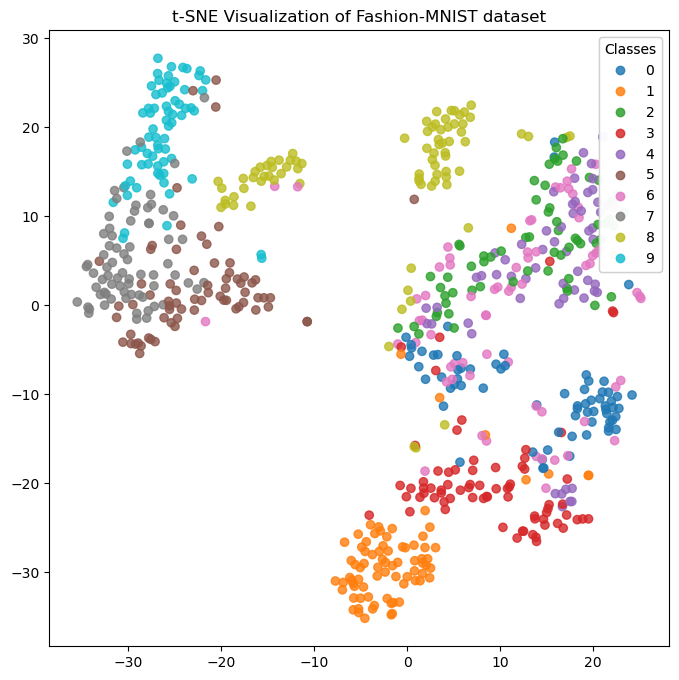

In [74]:
# run t-SNE on data_s and visualize the data in 2D using scatter plot
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(data_s)
fig, ax = plt.subplots(figsize=(8, 8))
scatter = ax.scatter(X_tsne[:, 0], X_tsne[:, 1], c=target_s, cmap='tab10', alpha=0.8)
legend = ax.legend(*scatter.legend_elements(), loc="upper right", title="Classes")
ax.add_artist(legend)
ax.set_title('t-SNE Visualization of Fashion-MNIST dataset')
plt.show()